In [1]:
# modules we'll use
import numpy as np
import pandas as pd

# For Box/Cox Transformation
from scipy import stats

# For min-max scaling
from mlxtend.preprocessing import minmax_scaling

#Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

## Scaling:
- Transforming the data so that it fits within a specific scale, like 0-100 or 0-1.
- This step is important while dealing with algorithms based on how far apart data points are like `SVM` or `KNN` 


For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

In [2]:
# scaling example
# Generating 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
original_data[0:10]

array([0.79587451, 1.25593076, 0.92322315, 0.78720115, 0.55104849,
       1.03815929, 0.5755192 , 2.22352441, 3.31491218, 0.4836021 ])

In [3]:
# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])
scaled_data[0:10]

array([[0.09290694],
       [0.14664878],
       [0.10778327],
       [0.09189375],
       [0.06430738],
       [0.12120963],
       [0.06716595],
       [0.25967902],
       [0.38717038],
       [0.05642858]])

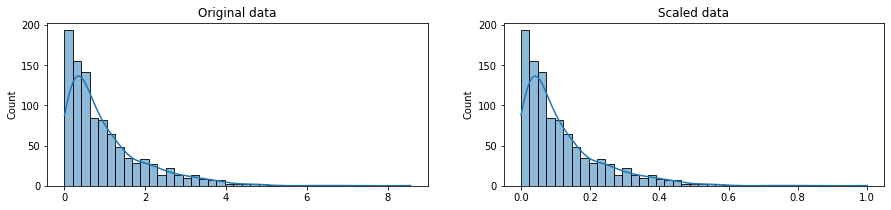

In [4]:
# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize = (15, 3))
sns.histplot(original_data, ax = ax[0], kde = True, legend = False)
ax[0].set_title("Original data") # Setting the title 
sns.histplot(scaled_data, ax = ax[1], kde = True, legend = False)
ax[1].set_title("Scaled data")
plt.show()

explanation of last cell code:

***1st line*** : [Source](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

`fig, ax = plt.subplots(1, 2, figsize = (15, 3))` --> `plt.subplots()` is a function that returns a tuple containing a **figure** and **axes objects**.

- Here, we unpack this tuple into the variables `fig` and `ax`.
- `fig` is useful if we want to change the figure level attributes `(15, 3)`
- The first two parameters define the no.of rows 'which is one here', and the no.of columns 'which is 2 here',, "*the plot have one row and two columns*".

***2nd line:***
`sns.histplot()` --> To create a histogram to visualize the distribution of the specificed data
- The first parameter is the data to be visualized.
- The second parameter is to specify thr axes objects, `ax[0]`means that we get the access of the 1st object in the list.

"note" --> `ax = ax[0]` means that the original data histogram will be on the left side and the scaled data on the right side.

***kde parameter: `kde=False`***
By default, seaborn plots both kernel density estimation and histogram, `kde=False` means you want to hide it and only display the histogram.


***Notice that in scaling*** `-->` the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

# Normalization
- The point of normalization is to change the observations so that they can be described as a normal distribution.
- We normalize the data if we are going to use a machine learning or statistics technique that assume the data is mornally distributed. (`ex.` linear discriminant analysis (LDA) and Gaussian naive Bayes)
- `Pro tip:` any method with "Gaussian" in the name probably assumes normality.

One of methods of normalization is `Box-Cox Transformation`.

Note: Normal Distribution (Bell Curve) (Gaussian Distribution) ---> A statistical distibution where:
* A roughly equal observations fall above and below the mean.
* The mean = The median 
* There are more observations closer to the mean.

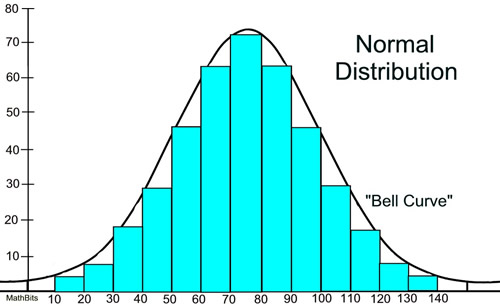

In [5]:
# normalize the exponential data with baxcox
normalized_data = stats.boxcox(original_data) 

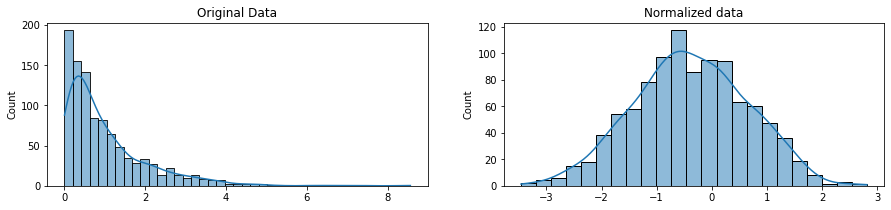

In [6]:
#plot both together to comapre
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()